Task: Predict the power consumption for Power Consumption Zone 1, Zone 2 and Zone 3

In [1]:
# Importing some of the important libraries.
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import mplcyberpunk
import time

# Cyberpunk theme 
plt.style.use('cyberpunk')

In [2]:
# loading the dataset
data = pd.read_csv('powerconsumption.csv')

In [3]:
# getting the first few rows of the data set.
data.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


Converting the Datetime column to Date-time object in pandas for further analysis.

In [4]:
# coverting into date time object.
data['Datetime'] = pd.to_datetime(data['Datetime'])

In [5]:
# getting months from the date time and appending in the dataset
data['Month'] = data['Datetime'].dt.month

# getting the day in the dataset.
data['Day'] = data['Datetime'].dt.day


In [6]:
# Getting general information about the columns 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Datetime                52416 non-null  datetime64[ns]
 1   Temperature             52416 non-null  float64       
 2   Humidity                52416 non-null  float64       
 3   WindSpeed               52416 non-null  float64       
 4   GeneralDiffuseFlows     52416 non-null  float64       
 5   DiffuseFlows            52416 non-null  float64       
 6   PowerConsumption_Zone1  52416 non-null  float64       
 7   PowerConsumption_Zone2  52416 non-null  float64       
 8   PowerConsumption_Zone3  52416 non-null  float64       
 9   Month                   52416 non-null  int32         
 10  Day                     52416 non-null  int32         
dtypes: datetime64[ns](1), float64(8), int32(2)
memory usage: 4.0 MB


In [7]:
# getting inporamtion about the numrical columns.
data.describe()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,Month,Day
count,52416,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,2017-07-01 23:55:00,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218,6.510989,15.678571
min,2017-01-01 00:00:00,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070,1.000000,1.000000
25%,2017-04-01 23:57:30,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630,4.000000,8.000000
50%,2017-07-01 23:55:00,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470,7.000000,16.000000
75%,2017-09-30 23:52:30,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420,9.250000,23.000000
max,2017-12-30 23:50:00,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360,12.000000,31.000000
std,NaN,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099,3.440642,8.771822


<Axes: >

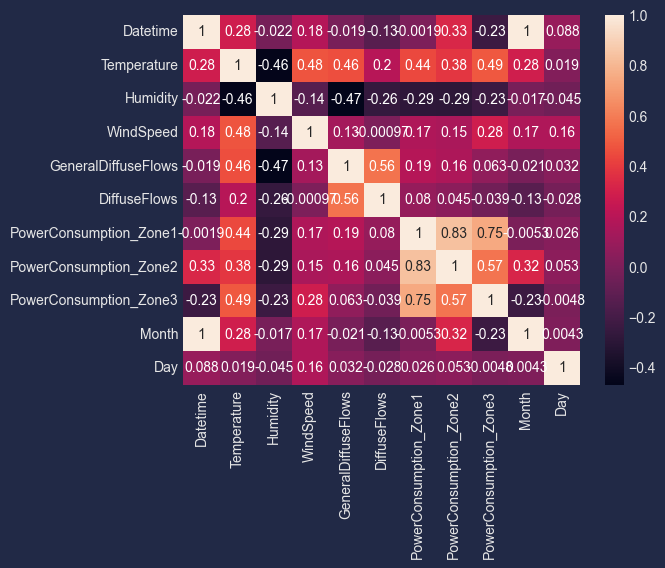

In [8]:
# creating a heat map for correlation of numerical features.
sns.heatmap(data = data.select_dtypes(exclude=object).corr(),annot=True)

### Exploratory Data Analysis

In this section we try to find patterns and insights from the data.

Text(0.5, 1.0, 'Temperature over the period')

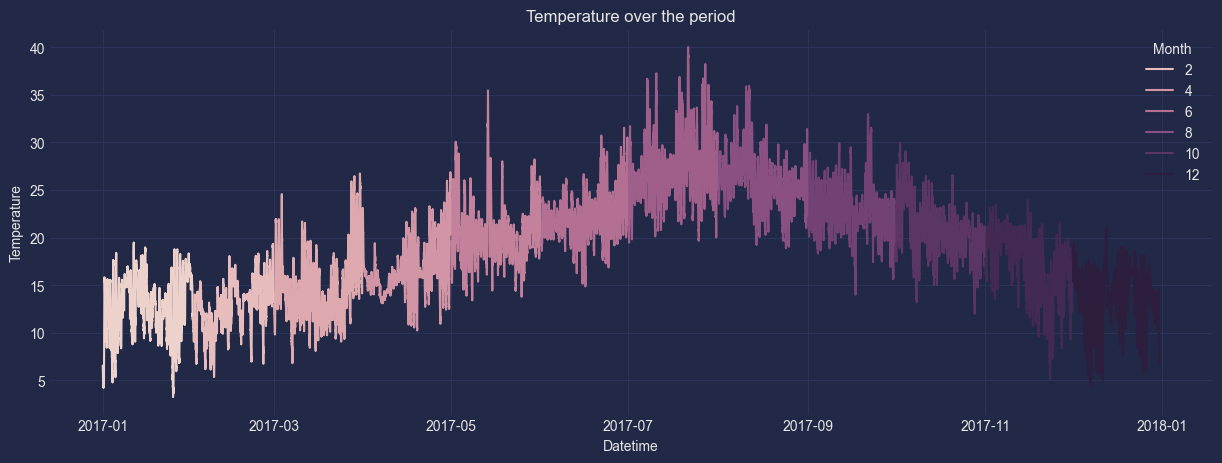

In [9]:
plt.figure(figsize=(15,5))
sns.lineplot(data=data,x= 'Datetime',y='Temperature',hue='Month')
plt.title('Temperature over the period')

Text(0.5, 1.0, 'Humidity over the period')

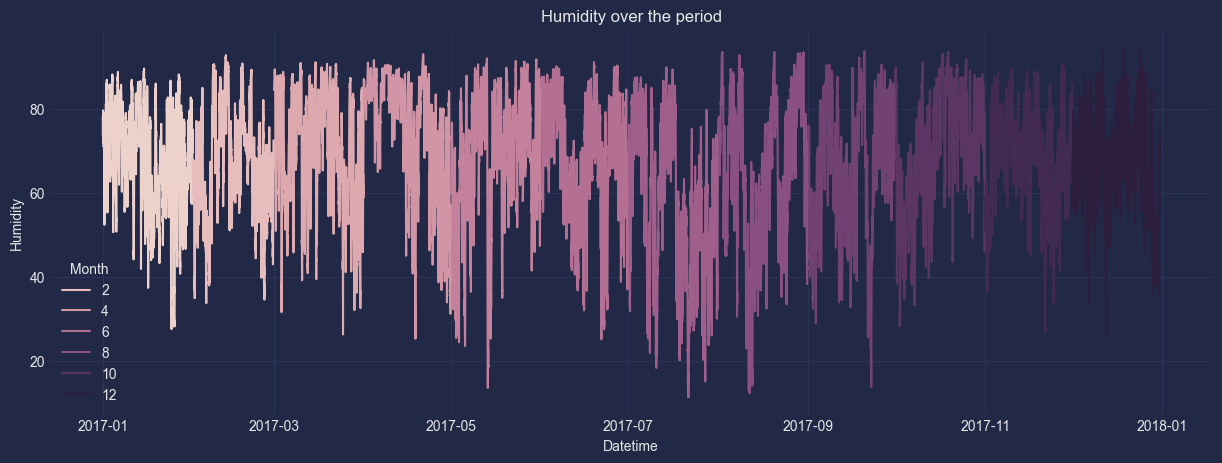

In [10]:
plt.figure(figsize=(15,5))
sns.lineplot(data=data,x= 'Datetime',y='Humidity',hue='Month')
plt.title('Humidity over the period')

Text(0.5, 1.0, 'Temperature over the period')

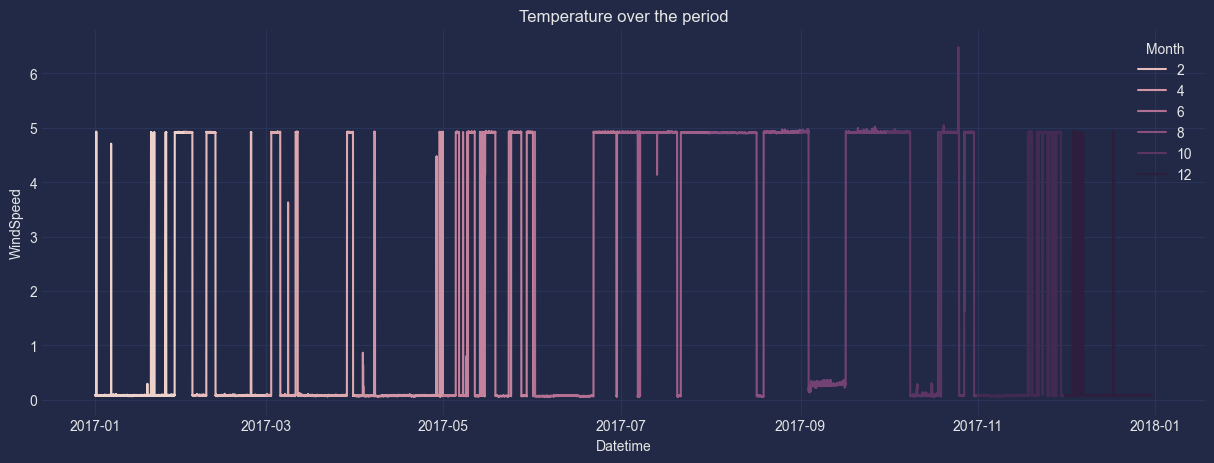

In [11]:
plt.figure(figsize=(15,5))
sns.lineplot(data=data,x= 'Datetime',y='WindSpeed',hue='Month')
plt.title('Temperature over the period')

It is very hard to guess a general trend from these graphs. Does taking montly average help in our understanding?

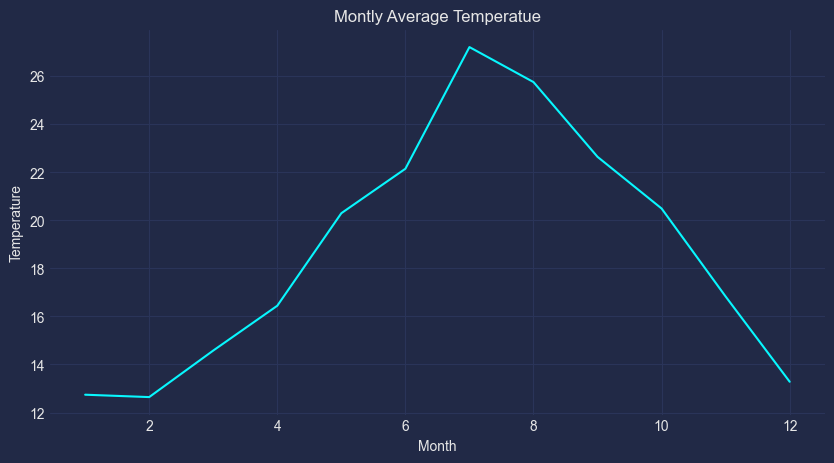

In [12]:
plt.figure(figsize=(10,5))
sns.lineplot(data=data.groupby('Month')['Temperature'].mean())
plt.title('Montly Average Temperatue')
plt.show()

Clearly the peak average temprature can be observed in the 7th month (july).

Similar plots for humidity and windspeed can be plotted.

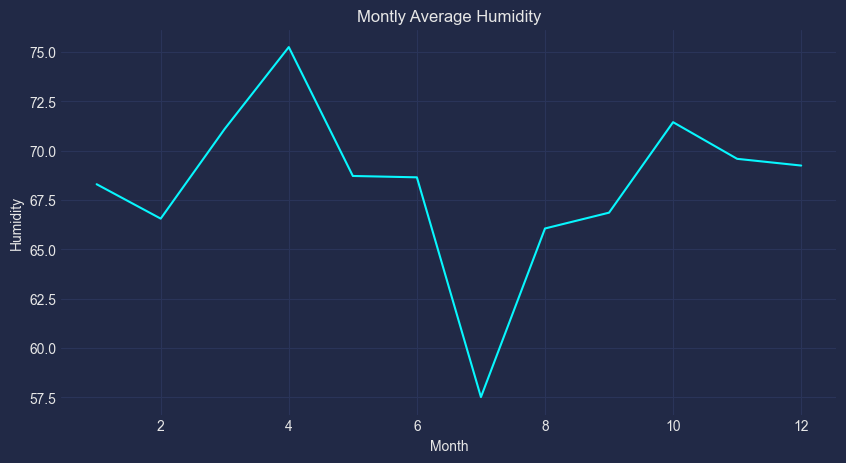

In [13]:
plt.figure(figsize=(10,5))
sns.lineplot(data=data.groupby('Month')['Humidity'].mean())
plt.title('Montly Average Humidity')
plt.show()

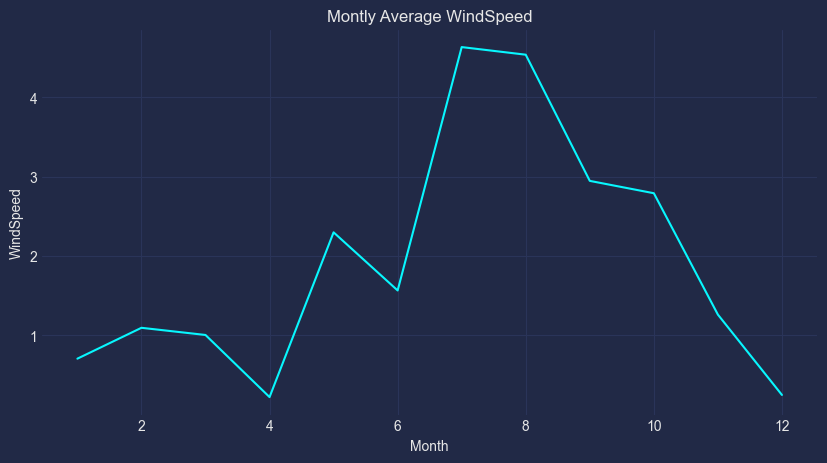

In [14]:
plt.figure(figsize=(10,5))
sns.lineplot(data=data.groupby('Month')['WindSpeed'].mean())
plt.title('Montly Average WindSpeed')
plt.show()

The higher values of the temprature are observed around the month of July ? Does this leads to higher power consumption in those months?

We compare the power consumption of the different zones.

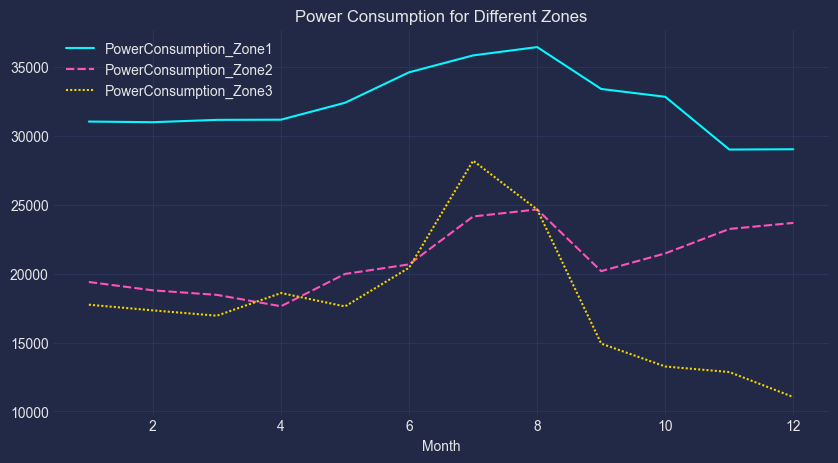

In [15]:
# Plotting the power consumption for different zones.
plt.figure(figsize=(10,5))
sns.lineplot(data=data.groupby('Month')[['PowerConsumption_Zone1','PowerConsumption_Zone2','PowerConsumption_Zone3']].mean())
plt.title('Power Consumption for Different Zones')
plt.show()

Yes the power consumption incease in the zones around july i.e. month 7

## Machine Learning

Now we have a regression prblem we start by impoting the required libraries from python. 

In [16]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import Lasso, Ridge, BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

Function to plot performance plots for different models.

In [17]:
# Now we define a function to plot difference performance metrics 

# function which plots accuracy scores, F1 score of the  
def performance_plots(df):
    plt.figure(figsize=(5,5))
    ax = sns.barplot(data=df,y = df.index,x = 'R2 Score',hue=df.index)
    for container in ax.containers:
        ax.bar_label(container)
    plt.title('R2 Score for Different Models')
    plt.show()

    plt.figure(figsize=(5,5))
    ax = sns.barplot(data=df,y = df.index,x = 'MSE',hue=df.index,order= df['MSE'].sort_values(ascending=True).index)
    for container in ax.containers:
        ax.bar_label(container)
    plt.title('Mean Square error for Different Models')
    plt.show()

    plt.figure(figsize=(5,5))
    ax = sns.barplot(data=df,y = df.index,x = 'MASE',hue=df.index,order= df['MASE'].sort_values(ascending=True).index)
    for container in ax.containers:
        ax.bar_label(container)
    plt.title('MASE for Different Models')
    plt.show()

    plt.figure(figsize=(5,5))
    ax = sns.barplot(data=df,y = df.index,x = 'Time Taken',hue=df.index,order= df['Time Taken'].sort_values(ascending=True).index)
    for container in ax.containers:
        ax.bar_label(container)
    plt.title('Model Fitting Time for Different Models')
    plt.show()

Function to fit regression models, returns a DataFrame containing r2 score, MSE, MASE and time taken to fit the models.

In [18]:
# Now we define a function to to fit different regression models and compare thier performance

def fit_reg_models(X_train,X_test,y_train,y_test):
    regressors = {'Linear Regressor':LinearRegression(),
              'Elasticnet Regressor':ElasticNet(),
              'Bayesian Ridge Regressor':BayesianRidge(),
              'CatBoost Regressor':CatBoostRegressor(logging_level='Silent'),
              'Decision Tree Regressor':DecisionTreeRegressor(),
              'AdaBoost Regressor':AdaBoostRegressor(),
              'Gradient Boosting Regressor':GradientBoostingRegressor()}

    # List for containing the list of regressors.
    regressors_list = []

    # List for containing the mean square error for the regressors.
    mse_list = []

    # List for containig the r2 score.
    r2_list = []

    # List for containing the mae.
    mase = []

    # List for containing time taken.
    time_taken = []

    # List to contain Training Accuarcy.
    train_acc = []
    

    for i in regressors:
        begin = time.time()
        model = regressors[i]
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        end = time.time()

        regressors_list.append(i)
        mse_list.append(mean_squared_error(y_test, y_pred))
        r2_list.append(r2_score(y_test, y_pred))
        mase.append(mean_absolute_error(y_test, y_pred))
        time_taken.append(end-begin)


    # Creating a Data Frame to contain the calculated valued for model accuracy, precision, recall and f1 score.
    table = pd.DataFrame(data = np.array([r2_list,mse_list,mase,time_taken]).T,
                            columns = ['R2 Score','MSE','MASE','Time Taken'],index=regressors_list)
    table.index.name = 'Models'
    table_sorted = table.sort_values(by='R2 Score', ascending=False)
    print('\n')
    print(f'Total time taken is {sum(time_taken)} sec')

    return table_sorted


Regression Model for Zone1: We try to find the power consumption for zone 1, when the power consumption for zone 2 and 3 are known.

In [19]:
# Getting the features from the data set
X1 = data[['Temperature', 'Humidity', 'WindSpeed',
       'GeneralDiffuseFlows', 'DiffuseFlows','PowerConsumption_Zone2','PowerConsumption_Zone3']]
y1 = data['PowerConsumption_Zone1']

# Splitting the data into training and testing data
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=24)

In [20]:
Zone1_Reg_models = fit_reg_models(X_train1,X_test1,y_train1,y_test1)
Zone1_Reg_models



Total time taken is 28.686244010925293 sec


,R2 Score,MSE,MASE,Time Taken
Models,,,,
CatBoost Regressor,0.964970,1.772956e+06,944.686990,6.935067
Decision Tree Regressor,0.947474,2.658478e+06,937.238410,1.083442
Gradient Boosting Regressor,0.922547,3.920111e+06,1420.466976,15.600298
AdaBoost Regressor,0.836108,8.295055e+06,2366.827607,4.928181
Linear Regressor,0.814496,9.388945e+06,2472.884503,0.024564
Bayesian Ridge Regressor,0.814488,9.389302e+06,2473.153587,0.013871
Elasticnet Regressor,0.814452,9.391140e+06,2474.206037,0.100822


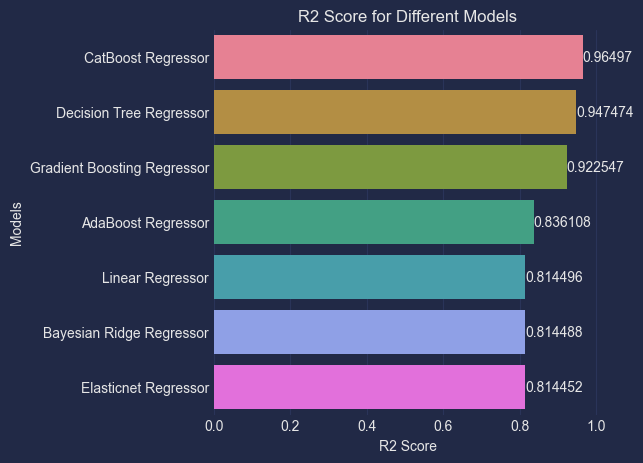

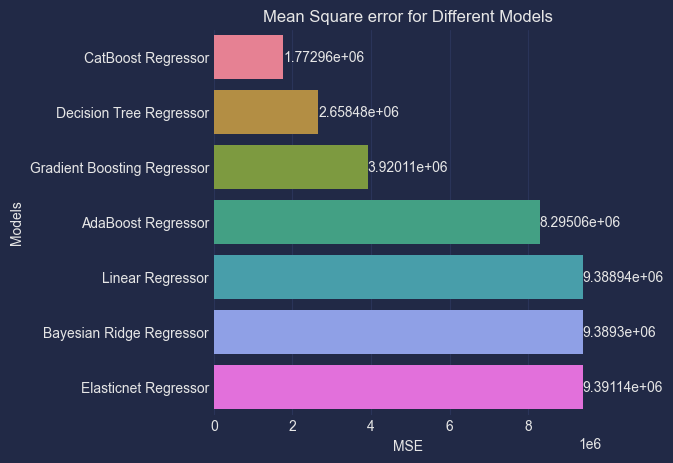

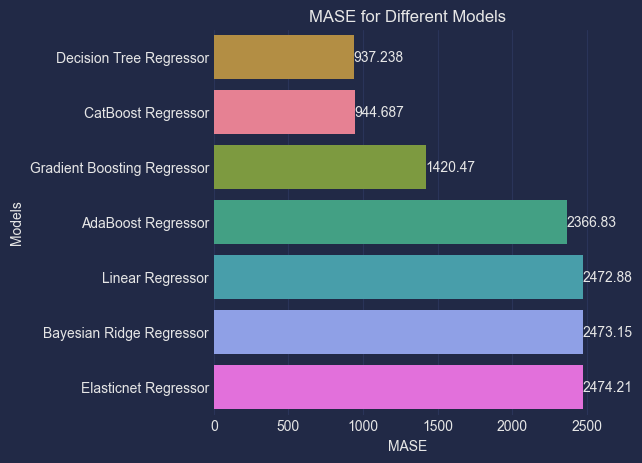

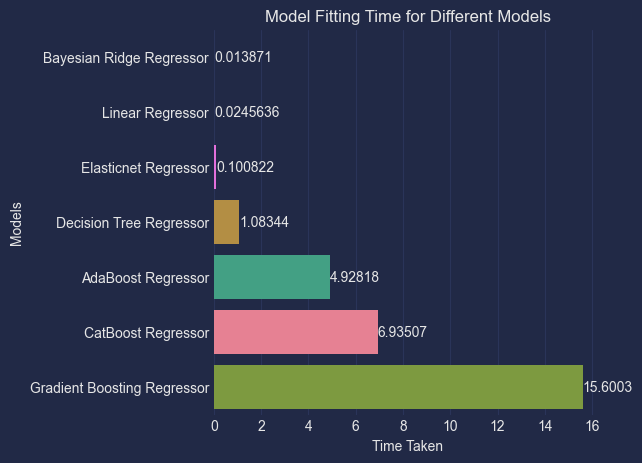

In [21]:
performance_plots(Zone1_Reg_models)

Catboost regressor performs best amoung all the models with an r2 score of 0.96

For Zone 2 

In [27]:
# Getting the features from the data set
X2 = data[['Temperature', 'Humidity', 'WindSpeed',
       'GeneralDiffuseFlows', 'DiffuseFlows','PowerConsumption_Zone1','PowerConsumption_Zone3']]
y2 = data['PowerConsumption_Zone2']

# Splitting the data into training and testing data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=24)

In [28]:
Zone2_Reg_models = fit_reg_models(X_train2,X_test2,y_train2,y_test2)
Zone2_Reg_models



Total time taken is 28.73159885406494 sec


,R2 Score,MSE,MASE,Time Taken
Models,,,,
CatBoost Regressor,0.933496,1.774743e+06,928.659920,6.713783
Decision Tree Regressor,0.898150,2.718017e+06,906.446449,1.134367
Gradient Boosting Regressor,0.858820,3.767589e+06,1403.809782,15.697327
AdaBoost Regressor,0.732167,7.147509e+06,2179.357101,5.056229
Linear Regressor,0.707698,7.800494e+06,2205.885564,0.015098
Bayesian Ridge Regressor,0.707691,7.800677e+06,2206.407704,0.011896
Elasticnet Regressor,0.707691,7.800685e+06,2206.421825,0.102900


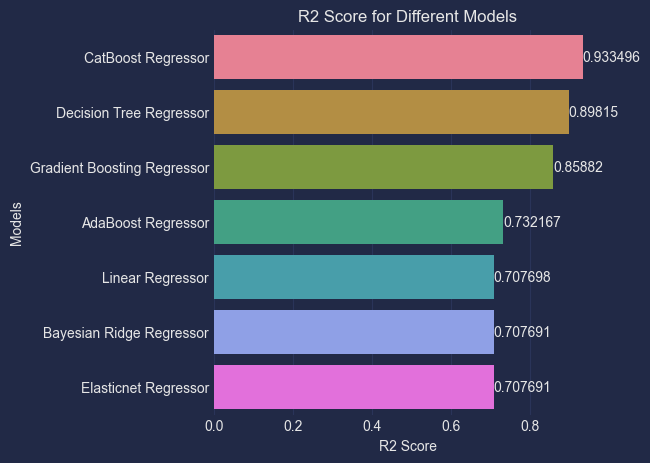

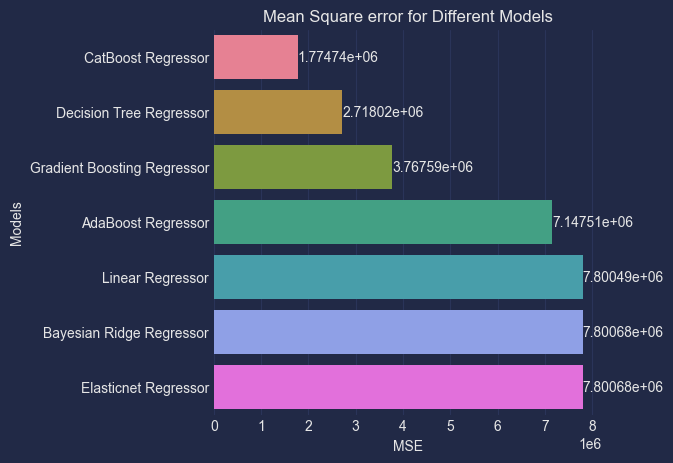

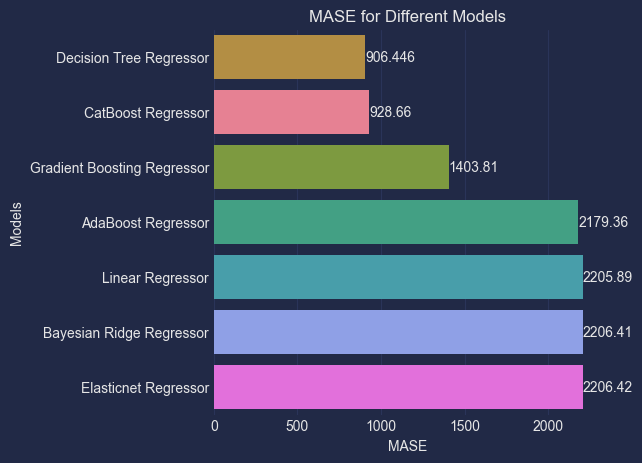

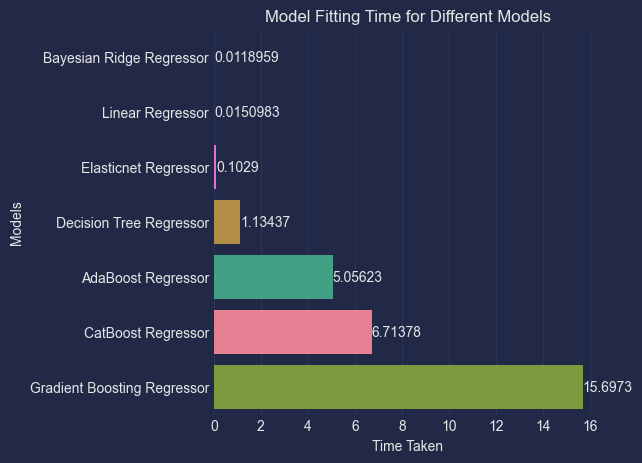

In [29]:
performance_plots(Zone2_Reg_models)

Catboost regressor performs best amoung all the models with an r2 score of 0.93

For Zone 3

In [30]:
# Getting the features from the data set
X3 = data[['Temperature', 'Humidity', 'WindSpeed',
       'GeneralDiffuseFlows', 'DiffuseFlows','PowerConsumption_Zone1','PowerConsumption_Zone2']]
y3 = data['PowerConsumption_Zone3']

# Splitting the data into training and testing data
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=24)

In [31]:
Zone3_Reg_models = fit_reg_models(X_train3,X_test3,y_train3,y_test3)
Zone3_Reg_models



Total time taken is 29.27816891670227 sec


,R2 Score,MSE,MASE,Time Taken
Models,,,,
CatBoost Regressor,0.933114,2.940067e+06,1212.819404,6.738934
Decision Tree Regressor,0.912797,3.833121e+06,995.296735,1.130059
Gradient Boosting Regressor,0.844982,6.814006e+06,1955.351247,16.137665
AdaBoost Regressor,0.745409,1.119082e+07,2780.924679,4.994350
Linear Regressor,0.642685,1.570619e+07,3069.860549,0.013851
Bayesian Ridge Regressor,0.642683,1.570627e+07,3069.779263,0.020797
Elasticnet Regressor,0.642607,1.570959e+07,3068.262147,0.242514


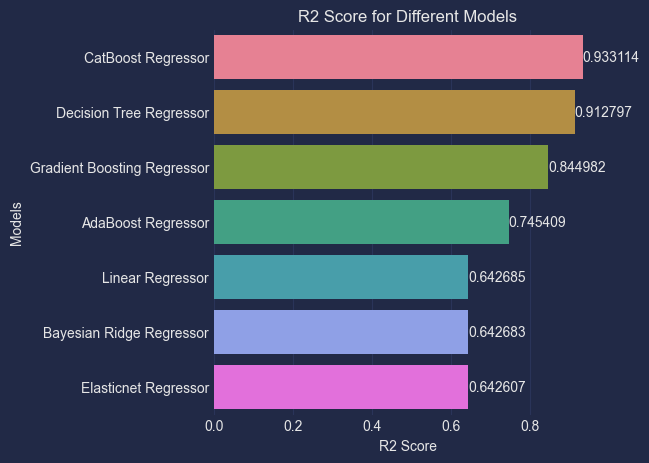

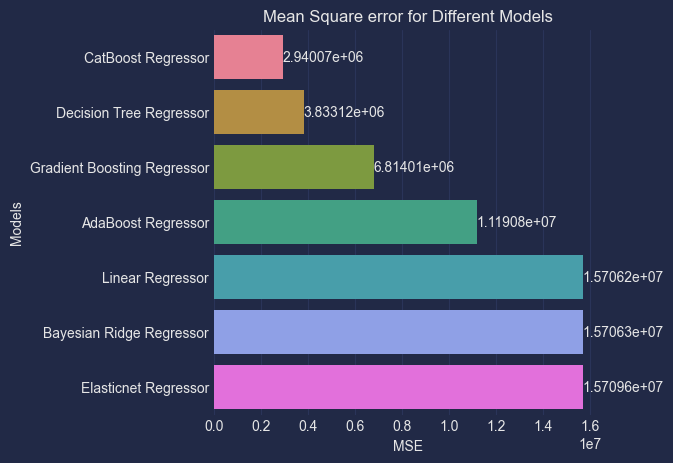

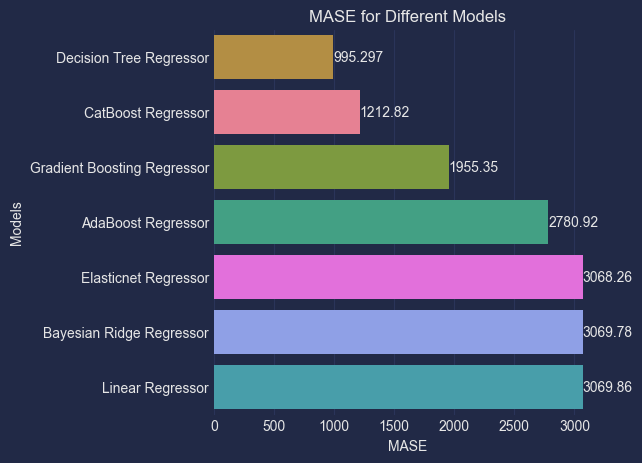

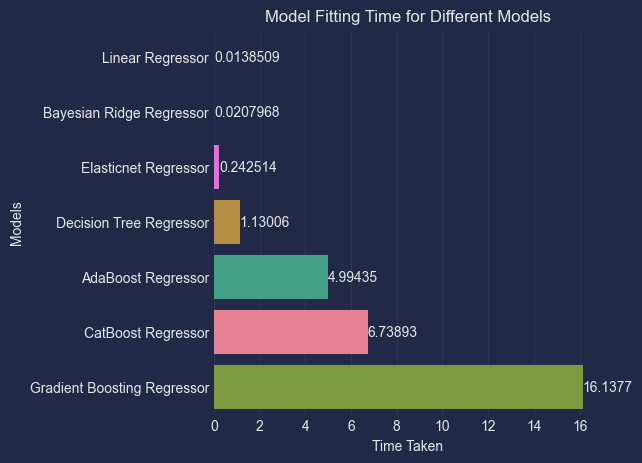

In [32]:
performance_plots(Zone3_Reg_models)

Catboost regressor performs best amoung all the models with an r2 score of 0.93

We can clearly see that we get very good fit for the models, when the power distributions for the other zones are known.

What happens when the power distibution for the other zones are not known?

In [22]:
# Getting the features from the data set
X1 = data[['Temperature', 'Humidity', 'WindSpeed',
       'GeneralDiffuseFlows', 'DiffuseFlows']]
y1 = data['PowerConsumption_Zone1']

# Splitting the data into training and testing data
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=24)

In [23]:
Zone1_Reg_models = fit_reg_models(X_train1,X_test1,y_train1,y_test1)
Zone1_Reg_models



Total time taken is 17.540791988372803 sec


,R2 Score,MSE,MASE,Time Taken
Models,,,,
CatBoost Regressor,0.492491,2.568657e+07,3805.182982,6.476298
Gradient Boosting Regressor,0.350305,3.288305e+07,4518.597749,8.804482
AdaBoost Regressor,0.236135,3.866154e+07,5106.188872,1.492770
Linear Regressor,0.215526,3.970461e+07,5177.715841,0.012969
Bayesian Ridge Regressor,0.215521,3.970486e+07,5177.724752,0.009159
Elasticnet Regressor,0.215255,3.971834e+07,5178.453595,0.054511
Decision Tree Regressor,0.191158,4.093794e+07,3825.348762,0.690603


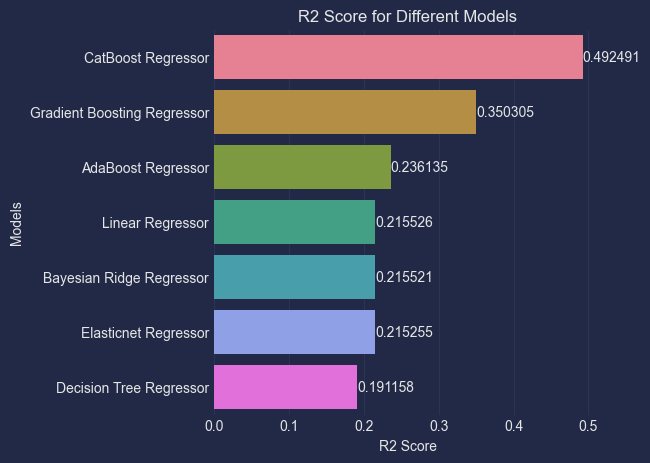

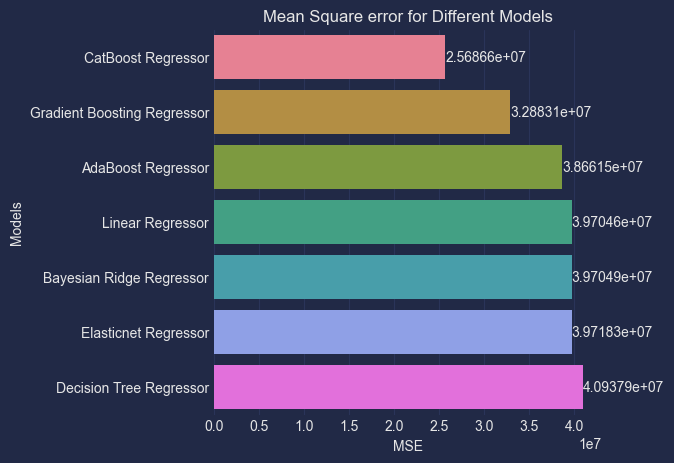

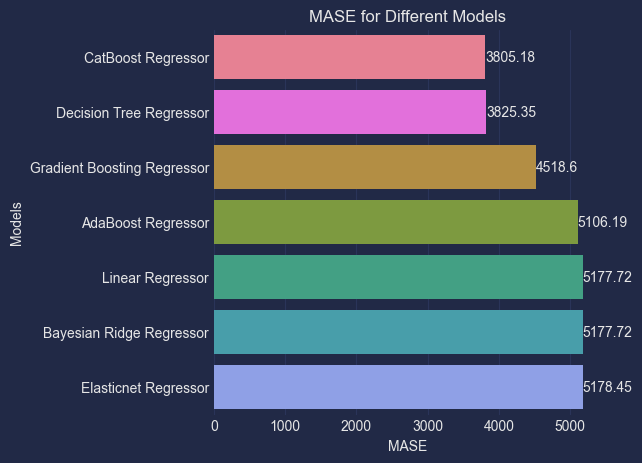

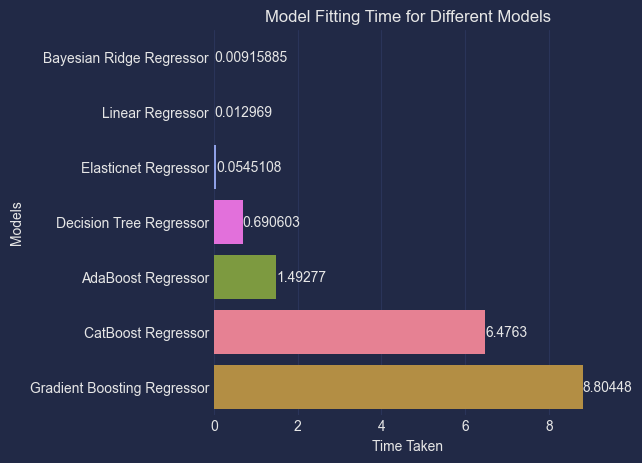

In [24]:
performance_plots(Zone1_Reg_models)

We can clealy see the powerformance of most of the models are reduced significantly. 

Can we optimize the models to explained further variance?

We try grid search on the best thtworee models to get the best fit, by finding the best hyperparamters.

In [26]:
# Paramters for grid search
params = {'iterations': [500, 550],'depth': [8,10],'learning_rate': [0.1,0.2],'l2_leaf_reg': [7,9,10]}

# begining time stamp
begin = time.time()

# grid search 
grid = GridSearchCV(CatBoostRegressor(logging_level='Silent'), params, cv=3,verbose=0)

# Fitting the model
grid.fit(X_train1,y_train1)

# getting the prediction 
y_pred = grid.predict(X_test1)

# ending timesatmp
end = time.time()

# Getting the best paramters 
print('Best Paramerters',grid.best_params_)

print('\n')

# Performance 
print('Total Time Taken:',end-begin,' secs\n')
print('r2 Score,',r2_score(y_test1,y_pred),'\n')
print('Mean Absolute Error:', mean_absolute_error(y_test1,y_pred),'\n')
print('Mean Squared Error:', mean_squared_error(y_test1,y_pred),'\n') 

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3] END depth=8, iterations=500, l2_leaf_reg=7, learning_rate=0.1;, score=0.490 total time=   4.4s
[CV 2/3] END depth=8, iterations=500, l2_leaf_reg=7, learning_rate=0.1;, score=0.469 total time=   4.1s
[CV 3/3] END depth=8, iterations=500, l2_leaf_reg=7, learning_rate=0.1;, score=0.480 total time=   4.0s
[CV 1/3] END depth=8, iterations=500, l2_leaf_reg=7, learning_rate=0.2;, score=0.506 total time=   4.0s
[CV 2/3] END depth=8, iterations=500, l2_leaf_reg=7, learning_rate=0.2;, score=0.481 total time=   4.0s
[CV 3/3] END depth=8, iterations=500, l2_leaf_reg=7, learning_rate=0.2;, score=0.496 total time=   4.0s
[CV 1/3] END depth=8, iterations=500, l2_leaf_reg=9, learning_rate=0.1;, score=0.487 total time=   4.2s
[CV 2/3] END depth=8, iterations=500, l2_leaf_reg=9, learning_rate=0.1;, score=0.468 total time=   4.1s
[CV 3/3] END depth=8, iterations=500, l2_leaf_reg=9, learning_rate=0.1;, score=0.481 total time=   4.1s
[CV

r2 score improved from 0.492491 to 0.54907, improving the model accuracy by 5%. Still the r2 score was very low. The Model prediction is not upto the mark.

In [40]:
# Paramters for grid search
params = {'n_estimators': [75,100],'learning_rate': [ 0.1, 0.2],'max_depth': [5,7,9]}

# begining time stamp
begin = time.time()

# grid search 
grid = GridSearchCV(GradientBoostingRegressor(), params, cv=3,verbose=0)

# Fitting the model
grid.fit(X_train1,y_train1)

# getting the prediction 
y_pred = grid.predict(X_test1)

# ending timesatmp
end = time.time()

# Getting the best paramters 
print('Best Paramerters',grid.best_params_)

print('\n')

# Performance 
print('Total Time Taken:',end-begin,' secs\n')
print('r2 Score,',r2_score(y_test1,y_pred),'\n')
print('Mean Absolute Error:', mean_absolute_error(y_test1,y_pred),'\n')
print('Mean Squared Error:', mean_squared_error(y_test1,y_pred),'\n') 


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3] END learning_rate=0.1, max_depth=5, n_estimators=75;, score=0.409 total time=   7.7s
[CV 2/3] END learning_rate=0.1, max_depth=5, n_estimators=75;, score=0.392 total time=   7.6s
[CV 3/3] END learning_rate=0.1, max_depth=5, n_estimators=75;, score=0.407 total time=   7.5s
[CV 1/3] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.419 total time=  10.4s
[CV 2/3] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.403 total time=  10.3s
[CV 3/3] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.416 total time=  10.2s
[CV 1/3] END learning_rate=0.1, max_depth=7, n_estimators=75;, score=0.462 total time=  10.9s
[CV 2/3] END learning_rate=0.1, max_depth=7, n_estimators=75;, score=0.447 total time=  10.8s
[CV 3/3] END learning_rate=0.1, max_depth=7, n_estimators=75;, score=0.461 total time=  11.0s
[CV 1/3] END learning_rate=0.1, max_depth=7, n_estimators=100;, score=0.469 total time=  1

r2 score improved from 0.35030 to 0.53982, improving the model accuracy by 18%. Still the r2 score was very low. The Model prediction is not upto the mark.

Using the machine learning model better prdiction cannot be given for different zones without knowing the power consumtption for the other zones.